### Here we generate mock source catalogs with different coordinate system and explore how that must be accounted to measure the correct shear profiles. 

In [1]:
import clmm
clmm.__version__

'1.12.5'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from clmm.support import mock_data as mock
from clmm import Cosmology

## Generate the mock catalog with different source galaxy options
In this example, the mock data includes: shape noise, galaxies drawn from redshift distribution and photoz errors.

In [4]:
mock_cosmo = Cosmology(H0=70.0, Omega_dm0=0.27 - 0.045, Omega_b0=0.045, Omega_k0=0.0)

In [5]:
cosmo = mock_cosmo
cluster_id = "Awesome_cluster"

cluster_m = 1.0e15  # M200,m
cluster_z = 0.3
# Cluster centre coordinates
cluster_ra = 50.0
cluster_dec = 87.0
concentration = 4

In [6]:
# let's put all these quantities in a single dictionary to facilitate clarity
cluster_kwargs = {
    "cluster_m": cluster_m,
    "cluster_z": cluster_z,
    "cluster_ra": cluster_ra,
    "cluster_dec": cluster_dec,
    "cluster_c": concentration,
    "cosmo": cosmo}

In [7]:
# let's put all these quantities in a single dictionary to facilitate clarity
source_kwargs = {
    "zsrc": "chang13",
    "zsrc_min": cluster_z + 0.1,
    "photoz_sigma_unscaled": 0.05,
    "ngals": 1000,
    "pz_bins": np.linspace(0, 10, 1001)}

In [8]:
np.random.seed(679)

mock_sources_euclidean_coord = mock.generate_galaxy_catalog(
    **cluster_kwargs,
    **source_kwargs,
    coordinate_system = "euclidean"
)

In [9]:
np.random.seed(679)

mock_sources_celestial_coord = mock.generate_galaxy_catalog(
    **cluster_kwargs,
    **source_kwargs,
    coordinate_system = "celestial"
)

In [10]:
mock_sources_euclidean_coord[:5]

ra,dec,e1,e2,z,ztrue,pzpdf,id
float64,float64,float64,float64,float64,float64,float64[1001],int64
47.723234904384796,87.0656774075493,-0.011529738473189206,-0.02040149427643137,3.1805837221695556,3.043830614065144,3.647766317906808e-54 .. 1.9074233381687797e-247,0
50.11980155700514,87.14872380985058,0.013958344929753234,0.0011203741510053653,0.7856618017433363,0.7400628671331151,8.99369409332192e-18 .. 0.0,1
50.215503632796754,87.14154284237922,0.019262690657235064,0.0029416444987064665,1.5389107660369346,1.4196555173326562,2.4191360060433974e-35 .. 0.0,2
51.55166808262403,87.18878322339597,0.009405867269504943,0.008985368631618624,1.6557865622055825,1.5926395218848042,1.1503818689219576e-35 .. 0.0,3
52.609866325677494,87.2011500545015,0.0028097533943904243,0.005749717868734056,0.5174117144571546,0.5827653595181967,2.631862057687664e-09 .. 0.0,4


In [11]:
mock_sources_celestial_coord[:5]

ra,dec,e1,e2,z,ztrue,pzpdf,id
float64,float64,float64,float64,float64,float64,float64[1001],int64
47.723234904384796,87.0656774075493,-0.011529738473189206,0.02040149427643137,3.1805837221695556,3.043830614065144,3.647766317906808e-54 .. 1.9074233381687797e-247,0
50.11980155700514,87.14872380985058,0.013958344929753234,-0.0011203741510053653,0.7856618017433363,0.7400628671331151,8.99369409332192e-18 .. 0.0,1
50.215503632796754,87.14154284237922,0.019262690657235064,-0.0029416444987064665,1.5389107660369346,1.4196555173326562,2.4191360060433974e-35 .. 0.0,2
51.55166808262403,87.18878322339597,0.009405867269504943,-0.008985368631618624,1.6557865622055825,1.5926395218848042,1.1503818689219576e-35 .. 0.0,3
52.609866325677494,87.2011500545015,0.0028097533943904243,-0.005749717868734056,0.5174117144571546,0.5827653595181967,2.631862057687664e-09 .. 0.0,4


## Generate cluster objects from mock data

In [12]:
import clmm.dataops
from clmm.dataops import compute_tangential_and_cross_components, make_radial_profile, make_bins
from clmm.galaxycluster import GalaxyCluster

In [13]:
cl_euclidean = GalaxyCluster(
        cluster_id, cluster_ra, cluster_dec, cluster_z, 
        mock_sources_euclidean_coord, 
        coordinate_system="euclidean"
)

In [14]:
cl_celestial = GalaxyCluster(
        cluster_id, cluster_ra, cluster_dec, cluster_z, 
        mock_sources_celestial_coord, 
        coordinate_system="celestial"
)

In [15]:
#here the mock sources have been generated with "celestial" coordinate, 
#but we don't pass this info to the GalaxyCluster object

cl_wrong_coordinate = GalaxyCluster(
        cluster_id, cluster_ra, cluster_dec, cluster_z, 
        mock_sources_celestial_coord,
        #this is equivalent to the default coordinate_system = "euclidean"
)

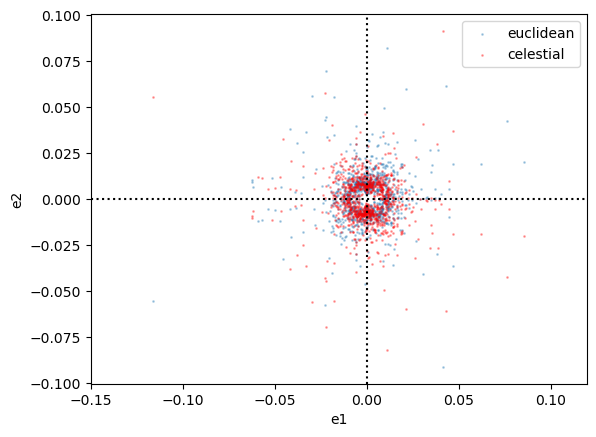

In [16]:
fig, ax1 = plt.subplots(1, 1)

ax1.scatter(cl_euclidean.galcat["e1"], cl_euclidean.galcat["e2"], s=1, alpha=0.3, label='euclidean')
ax1.scatter(cl_celestial.galcat["e1"], cl_celestial.galcat["e2"], s=1, alpha=0.3, color='red',label='celestial')

ax1.set_xlabel("e1")
ax1.set_ylabel("e2")
ax1.set_aspect("equal", "datalim")
ax1.axvline(0, linestyle="dotted", color="black")
ax1.axhline(0, linestyle="dotted", color="black")
plt.legend()

## Compute and plot shear profiles

In [17]:
cl_euclidean.compute_tangential_and_cross_components(add=True)
cl_euclidean.galcat["et", "ex"].pprint(max_width=-1)

          et                     ex          
--------------------- -----------------------
  0.02343407429303324  -1.214306433183765e-17
 0.014003236462197187                     0.0
   0.0194860084089354                     0.0
 0.013007966349034745                     0.0
0.0063995288660438285                     0.0
  0.01814716906590478 -1.0842021724855044e-19
 0.013463206312051472  -6.071532165918825e-18
 0.017087888114434374   4.336808689942018e-19
 0.007014354293438141 -3.2526065174565133e-18
 0.007324384676924073                     0.0
                  ...                     ...
 0.012995723322966854 -6.5052130349130266e-18
  0.01143184708723896  -5.204170427930421e-18
 0.006569475360506179 -3.0357660829594124e-18
 0.017779892137189217  -6.938893903907228e-18
  0.01147380711462187  -5.421010862427522e-18
  0.01044444821229118                     0.0
  0.01719223310320743  -9.540979117872439e-18
 0.013823571306899037   4.336808689942018e-19
 0.008850172017011177   8.67361737

In [18]:
cl_celestial.compute_tangential_and_cross_components(add=True)
cl_celestial.galcat["et", "ex"].pprint(max_width=-1)

          et                    ex          
--------------------- ----------------------
 0.023434074293033236 1.9081958235744878e-17
 0.014003236462197187  3.469446951953614e-18
   0.0194860084089354  4.336808689942018e-18
 0.013007966349034745  4.336808689942018e-18
 0.006399528866043828  1.734723475976807e-18
  0.01814716906590478  4.662069341687669e-18
  0.01346320631205147  8.673617379884035e-18
  0.01708788811443437  4.336808689942018e-18
 0.007014354293438142  5.204170427930421e-18
 0.007324384676924072  1.734723475976807e-18
                  ...                    ...
 0.012995723322966852  9.974659986866641e-18
  0.01143184708723896  8.673617379884035e-18
0.0065694753605061796  5.204170427930421e-18
  0.01777989213718922  1.214306433183765e-17
 0.011473807114621868  8.456776945386935e-18
  0.01044444821229118 2.6020852139652106e-18
  0.01719223310320743 1.3877787807814457e-17
 0.013823571306899035 3.0357660829594124e-18
 0.008850172017011175 2.6020852139652106e-18
 0.0066281

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


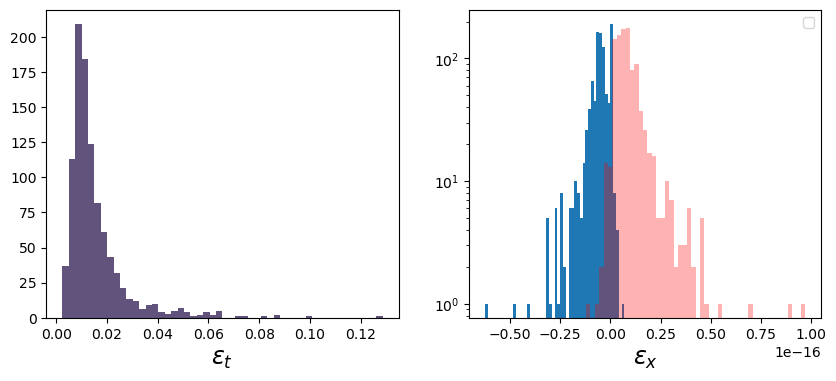

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(cl_euclidean.galcat["et"], bins=50)
ax[0].hist(cl_celestial.galcat["et"], bins=50,color='red',alpha=0.3)
ax[0].set_xlabel("$\\epsilon_t$", fontsize="xx-large")

ax[1].hist(cl_euclidean.galcat["ex"], bins=50)
ax[1].hist(cl_celestial.galcat["ex"], bins=50,color='red',alpha=0.3)
ax[1].set_xlabel("$\\epsilon_x$", fontsize="xx-large")
ax[1].set_yscale("log")

plt.legend()

In [20]:
cl_euclidean.make_radial_profile("kpc", cosmo=cosmo)
cl_euclidean.profile.show_in_notebook()

idx,radius_min,radius,radius_max,gt,gt_err,gx,gx_err,z,z_err,n_src,W_l
0,156.71960928359934,464.4671603593981,699.5921737891952,0.06413360677252622,0.004914333288851318,-1.715010709204343e-17,4.034498594037631e-18,1.0911552118175314,0.11083918127320175,22,22.0
1,699.5921737891952,1011.2963458867513,1242.464738294791,0.039642488178504826,0.0016015681719071773,-1.50965113609602e-17,1.4037968563596243e-18,1.340843180212603,0.09927515578213908,54,54.0
2,1242.464738294791,1546.8197998039764,1785.3373028003869,0.02498877958964601,0.0008174836500513263,-8.045864322014928e-18,7.330813994518638e-19,1.141074816459248,0.07695590512125049,75,75.0
3,1785.3373028003869,2063.99121745076,2328.2098673059827,0.01921493231328005,0.0003916691096211929,-7.364822727368162e-18,3.971381403743137e-19,1.1760684211114605,0.05471300278442932,125,125.0
4,2328.2098673059827,2584.348460286764,2871.0824318115783,0.014872649894901871,0.00028689758132636664,-5.324571864838686e-18,3.1142934756710057e-19,1.2143592720456875,0.054067348171772577,138,138.0
5,2871.0824318115783,3154.1249537829503,3413.9549963171744,0.011371593615157109,0.00020822193844039795,-4.413359292550124e-18,2.0335406513695774e-19,1.2083318981155682,0.05274388342400906,192,192.0
6,3413.9549963171744,3680.7344103618984,3956.8275608227705,0.009920196782261583,0.00015732778542169504,-3.97012477722782e-18,1.6341242745876745e-19,1.311099393646099,0.05334127819405377,177,177.0
7,3956.8275608227705,4185.790588727914,4499.700125328366,0.008084689997088943,0.00017398558743095897,-2.757239249030866e-18,1.9209518576841595e-19,1.2856917023015786,0.07887750338660866,121,121.0
8,4499.700125328366,4733.6762564943365,5042.572689833962,0.00711930821972751,0.00018520179246980147,-2.4475459490810818e-18,2.0029258865114398e-19,1.3173896415983801,0.08741388146537891,67,67.0
9,5042.572689833962,5250.313838563012,5585.445254339558,0.005897636633904643,0.00026238880980461676,-1.7660344869925525e-18,2.883192426744197e-19,1.195583526441637,0.1086754688799238,29,29.0


In [21]:
cl_celestial.make_radial_profile("kpc", cosmo=cosmo)
# cl.profile.pprint(max_width=-1)
cl_celestial.profile.show_in_notebook()

idx,radius_min,radius,radius_max,gt,gt_err,gx,gx_err,z,z_err,n_src,W_l
0,156.71960928359934,464.4671603593981,699.5921737891952,0.06413360677252622,0.004914333288851318,3.236836304038542e-17,5.694604839281488e-18,1.0911552118175314,0.11083918127320175,22,22.0
1,699.5921737891952,1011.2963458867513,1242.464738294791,0.039642488178504826,0.0016015681719071773,2.3942797975721554e-17,1.7339256407665797e-18,1.340843180212603,0.09927515578213908,54,54.0
2,1242.464738294791,1546.8197998039764,1785.3373028003869,0.02498877958964601,0.0008174836500513263,1.4314947158778716e-17,8.226643047345753e-19,1.141074816459248,0.07695590512125049,75,75.0
3,1785.3373028003869,2063.99121745076,2328.2098673059827,0.019214932313280052,0.0003916691096211907,1.150143348616073e-17,5.485774815412368e-19,1.1760684211114605,0.05471300278442932,125,125.0
4,2328.2098673059827,2584.348460286764,2871.0824318115783,0.014872649894901871,0.00028689758132636594,9.229663820156945e-18,4.1130251561838557e-19,1.2143592720456875,0.054067348171772577,138,138.0
5,2871.0824318115783,3154.1249537829503,3413.9549963171744,0.011371593615157109,0.00020822193844039795,7.167239869271198e-18,2.495744946047253e-19,1.2083318981155682,0.05274388342400906,192,192.0
6,3413.9549963171744,3680.7344103618984,3956.8275608227705,0.009920196782261583,0.00015732778542169504,6.286305265765002e-18,2.389401104568704e-19,1.311099393646099,0.05334127819405377,177,177.0
7,3956.8275608227705,4185.790588727914,4499.700125328366,0.008084689997088943,0.00017398558743095897,4.540068596193885e-18,2.5057110197055964e-19,1.2856917023015786,0.07887750338660866,121,121.0
8,4499.700125328366,4733.6762564943365,5042.572689833962,0.00711930821972751,0.00018520179246980147,4.442397035844523e-18,2.558011256616628e-19,1.3173896415983801,0.08741388146537891,67,67.0
9,5042.572689833962,5250.313838563012,5585.445254339558,0.0058976366339046436,0.0002623888098046163,3.2037706868424034e-18,3.1456351012656695e-19,1.195583526441637,0.1086754688799238,29,29.0


<ErrorbarContainer object of 3 artists>

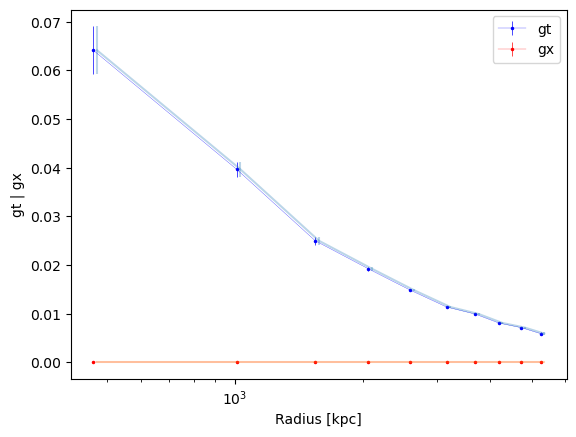

In [22]:
fig, ax = cl_euclidean.plot_profiles(xscale="log")

ax.errorbar(cl_celestial.profile['radius']*1.02, cl_celestial.profile['gt'],
            yerr= cl_celestial.profile['gt_err'],alpha=0.3)

ax.errorbar(cl_celestial.profile['radius']*1.02, cl_celestial.profile['gx'],
            yerr= cl_celestial.profile['gx_err'],alpha=0.3)

### => When the correct coordinate system is specified, the profiles coming from the two catalogs are identical.

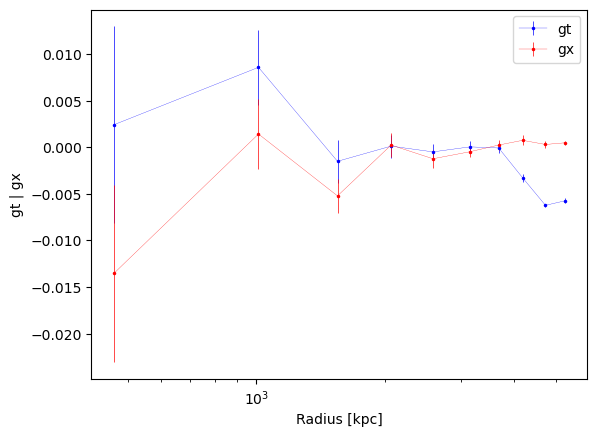

In [23]:
cl_wrong_coordinate.compute_tangential_and_cross_components(add=True)
cl_wrong_coordinate.make_radial_profile("kpc", cosmo=cosmo)
fig, ax = cl_wrong_coordinate.plot_profiles(xscale="log")

### => However, when the coordinate system is not correctly specified, the profiles are incorrect.

In [24]:
#to recover the correct profile we need to compute the quantities outside of 
#the GalaxyCluster object and add them back as galcat column in the GalacyCluster object

#ideally, we would like to just do 
#cl_wrong_coordinate.compute_tangential_and_cross_components(coordinate_system='celestial', add=True)
#but this does not work at the moment

theta, et, ex = compute_tangential_and_cross_components(
    cl_wrong_coordinate.ra, cl_wrong_coordinate.dec, 
    cl_wrong_coordinate.galcat['ra'],cl_wrong_coordinate.galcat['dec'], 
    cl_wrong_coordinate.galcat['e1'],cl_wrong_coordinate.galcat['e2'],
    coordinate_system='celestial')

In [25]:
cl_wrong_coordinate.galcat.add_column(et,name='et_celestial')
cl_wrong_coordinate.galcat.add_column(ex,name='ex_celestial')

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/galaxycluster.py:630: UserWarning: overwriting profile table.
  warnings.warn(f"overwriting {table_name} table.")


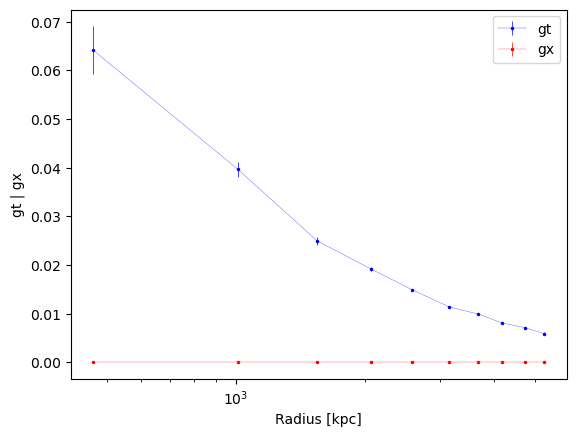

In [26]:
cl_wrong_coordinate.make_radial_profile(bin_units="kpc",
    tan_component_in='et_celestial', cross_component_in='ex_celestial',
    cosmo=cosmo)

fig, ax = cl_wrong_coordinate.plot_profiles(xscale="log")

### => Now the profiles are correct. 

## Same thing for Delta Sigma profiles

In [27]:
cl_euclidean.compute_tangential_and_cross_components(
    shape_component1="e1",
    shape_component2="e2",
    tan_component="DeltaSigma_tan",
    cross_component="DeltaSigma_cross",
    add=True,
    cosmo=cosmo,
    is_deltasigma=True,
);

#cl_euclidean.profile.show_in_notebook()

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/cosmology/parent_class.py:110: UserWarning: 
Some source redshifts are lower than the cluster redshift.
Sigma_crit = np.inf for those galaxies.
  return compute_for_good_redshifts(
/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/dataops/__init__.py:174: RuntimeWarning: invalid value encountered in multiply
  cross_comp *= _sigma_c_arr


In [28]:
cl_euclidean.make_radial_profile(
    "Mpc",
    cosmo=cosmo,
    tan_component_in="DeltaSigma_tan",
    cross_component_in="DeltaSigma_cross",
    tan_component_out="DeltaSigma_tan",
    cross_component_out="DeltaSigma_cross",
    table_name="DeltaSigma_profile",
    use_weights=False,
);

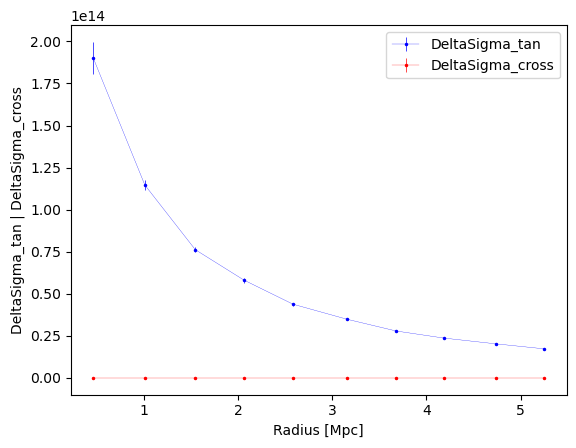

In [29]:
fig1, ax1 = cl_euclidean.plot_profiles(tangential_component="DeltaSigma_tan",
                                       cross_component="DeltaSigma_cross", 
                                       tangential_component_error="DeltaSigma_tan_err", 
                                       cross_component_error="DeltaSigma_cross_err",
                                       table_name="DeltaSigma_profile")

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/cosmology/parent_class.py:110: UserWarning: 
Some source redshifts are lower than the cluster redshift.
Sigma_crit = np.inf for those galaxies.
  return compute_for_good_redshifts(


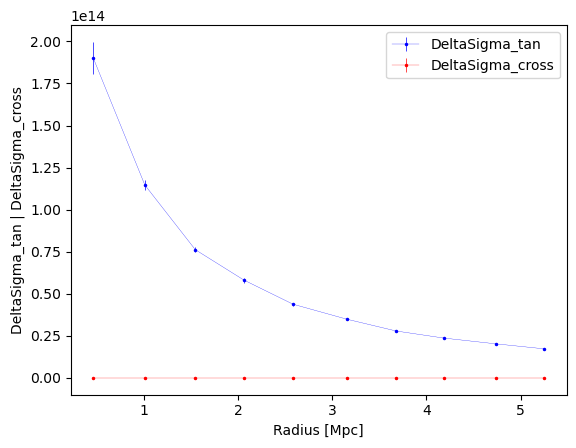

In [30]:
cl_celestial.compute_tangential_and_cross_components(
    shape_component1="e1",
    shape_component2="e2",
    tan_component="DeltaSigma_tan",
    cross_component="DeltaSigma_cross",
    add=True,
    cosmo=cosmo,
    is_deltasigma=True,
);

cl_celestial.make_radial_profile(
    "Mpc",
    cosmo=cosmo,
    tan_component_in="DeltaSigma_tan",
    cross_component_in="DeltaSigma_cross",
    tan_component_out="DeltaSigma_tan",
    cross_component_out="DeltaSigma_cross",
    table_name="DeltaSigma_profile",
    use_weights=False,
);

fig2, ax2 = cl_celestial.plot_profiles(
    tangential_component="DeltaSigma_tan", 
    cross_component="DeltaSigma_cross",
        tangential_component_error="DeltaSigma_tan_err", 
    cross_component_error="DeltaSigma_cross_err",
    table_name="DeltaSigma_profile")

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/galaxycluster.py:630: UserWarning: overwriting DeltaSigma_profile table.
  warnings.warn(f"overwriting {table_name} table.")


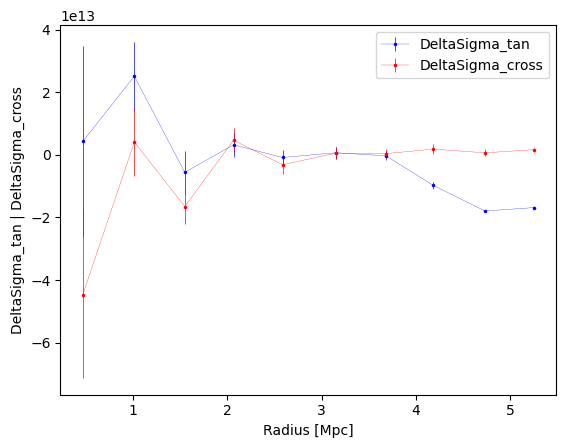

In [46]:
cl_wrong_coordinate.compute_tangential_and_cross_components(
    shape_component1="e1",
    shape_component2="e2",
    tan_component="DeltaSigma_tan",
    cross_component="DeltaSigma_cross",
    add=True,
    cosmo=cosmo,
    is_deltasigma=True,
);

cl_wrong_coordinate.make_radial_profile(
    "Mpc",
    cosmo=cosmo,
    tan_component_in="DeltaSigma_tan",
    cross_component_in="DeltaSigma_cross",
    tan_component_out="DeltaSigma_tan",
    cross_component_out="DeltaSigma_cross",
    table_name="DeltaSigma_profile",
    use_weights=False,
);

fig2, ax2 = cl_wrong_coordinate.plot_profiles(
    tangential_component="DeltaSigma_tan", 
    cross_component="DeltaSigma_cross",
    tangential_component_error="DeltaSigma_tan_err", 
    cross_component_error="DeltaSigma_cross_err",
    table_name="DeltaSigma_profile")

In [32]:
sigma_c = cosmo.eval_sigma_crit(cl_wrong_coordinate.z, cl_wrong_coordinate.galcat['z'])

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/cosmology/parent_class.py:110: UserWarning: 
Some source redshifts are lower than the cluster redshift.
Sigma_crit = np.inf for those galaxies.
  return compute_for_good_redshifts(


In [33]:
#to recover the correct profile we need to compute the quantities outside of 
#the GalaxyCluster object and add them back as galcat column in the GalacyCluster object

#ideally, we would like to just do 
#cl_wrong_coordinate.compute_tangential_and_cross_components(coordinate_system='celestial', add=True)
#but this does not work at the moment

theta, dstan, dscross = compute_tangential_and_cross_components(
    cl_wrong_coordinate.ra, cl_wrong_coordinate.dec, 
    cl_wrong_coordinate.galcat['ra'],cl_wrong_coordinate.galcat['dec'], 
    cl_wrong_coordinate.galcat['e1'],cl_wrong_coordinate.galcat['e2'],
    coordinate_system='celestial', 
    is_deltasigma=True,
    sigma_c = sigma_c )

In [34]:
cl_wrong_coordinate.galcat.add_column(dstan,name='DeltaSigma_tan_celestial')
cl_wrong_coordinate.galcat.add_column(dscross,name='DeltaSigma_cross_celestial')

In [35]:
cl_wrong_coordinate.make_radial_profile("Mpc",
    cosmo=cosmo,
    tan_component_in="DeltaSigma_tan_celestial",
    cross_component_in="DeltaSigma_cross_celestial",
    tan_component_out="DeltaSigma_tan",
    cross_component_out="DeltaSigma_cross",
    table_name="DeltaSigma_profile",
    use_weights=False,)

/pbs/home/m/mricci/.conda/envs/clmm/lib/python3.10/site-packages/clmm/galaxycluster.py:630: UserWarning: overwriting DeltaSigma_profile table.
  warnings.warn(f"overwriting {table_name} table.")


radius_min,radius,radius_max,DeltaSigma_tan,DeltaSigma_tan_err,DeltaSigma_cross,DeltaSigma_cross_err,z,z_err,n_src,W_l
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
0.15671960928359935,0.46446716035939806,0.6995921737891952,190051501875241.06,9649983174328.586,0.09215345961649268,0.015270074502458262,1.0911552118175314,0.11083918127320175,22,22.0
0.6995921737891952,1.0112963458867514,1.242464738294791,114653094293426.97,2898979264141.766,0.06784158721185626,0.004167236144654282,1.340843180212603,0.09927515578213908,54,54.0
1.242464738294791,1.546819799803977,1.785337302800387,76228503835158.64,1289719458562.2153,0.04429997672191164,0.002370525789413681,1.141074816459248,0.07695590512125049,75,75.0
1.785337302800387,2.0639912174507593,2.328209867305983,58120008332907.984,1534873725602.767,0.03498729466831276,0.0016337497972184402,1.1760684211114605,0.05471300278442932,125,125.0
2.328209867305983,2.584348460286765,2.871082431811579,43811132825732.35,818536036351.0841,0.027372871133279072,0.001264376953028166,1.2143592720456875,0.054067348171772577,138,138.0
2.871082431811579,3.1541249537829494,3.4139549963171745,34918820509793.312,715700841252.0444,0.02161699742545974,0.0006777947504387136,1.2083318981155682,0.05274388342400906,192,192.0
3.4139549963171745,3.6807344103619006,3.95682756082277,27867318283193.94,288016404616.3745,0.01764751408471792,0.0006936147755028247,1.311099393646099,0.05334127819405377,177,177.0
3.95682756082277,4.1857905887279125,4.499700125328366,23676492252914.723,325892892395.3659,0.013206030331073563,0.0006652124116508021,1.2856917023015786,0.07887750338660866,121,121.0
4.499700125328366,4.733676256494335,5.042572689833962,20277822255721.855,348381428571.66223,0.01301421018866444,0.0009175728511681354,1.3173896415983801,0.08741388146537891,67,67.0


In [36]:
cl_wrong_coordinate.DeltaSigma_profile

radius_min,radius,radius_max,DeltaSigma_tan,DeltaSigma_tan_err,DeltaSigma_cross,DeltaSigma_cross_err,z,z_err,n_src,W_l
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
0.15671960928359935,0.46446716035939806,0.6995921737891952,190051501875241.06,9649983174328.586,0.09215345961649268,0.015270074502458262,1.0911552118175314,0.11083918127320175,22,22.0
0.6995921737891952,1.0112963458867514,1.242464738294791,114653094293426.97,2898979264141.766,0.06784158721185626,0.004167236144654282,1.340843180212603,0.09927515578213908,54,54.0
1.242464738294791,1.546819799803977,1.785337302800387,76228503835158.64,1289719458562.2153,0.04429997672191164,0.002370525789413681,1.141074816459248,0.07695590512125049,75,75.0
1.785337302800387,2.0639912174507593,2.328209867305983,58120008332907.984,1534873725602.767,0.03498729466831276,0.0016337497972184402,1.1760684211114605,0.05471300278442932,125,125.0
2.328209867305983,2.584348460286765,2.871082431811579,43811132825732.35,818536036351.0841,0.027372871133279072,0.001264376953028166,1.2143592720456875,0.054067348171772577,138,138.0
2.871082431811579,3.1541249537829494,3.4139549963171745,34918820509793.312,715700841252.0444,0.02161699742545974,0.0006777947504387136,1.2083318981155682,0.05274388342400906,192,192.0
3.4139549963171745,3.6807344103619006,3.95682756082277,27867318283193.94,288016404616.3745,0.01764751408471792,0.0006936147755028247,1.311099393646099,0.05334127819405377,177,177.0
3.95682756082277,4.1857905887279125,4.499700125328366,23676492252914.723,325892892395.3659,0.013206030331073563,0.0006652124116508021,1.2856917023015786,0.07887750338660866,121,121.0
4.499700125328366,4.733676256494335,5.042572689833962,20277822255721.855,348381428571.66223,0.01301421018866444,0.0009175728511681354,1.3173896415983801,0.08741388146537891,67,67.0


<ErrorbarContainer object of 3 artists>

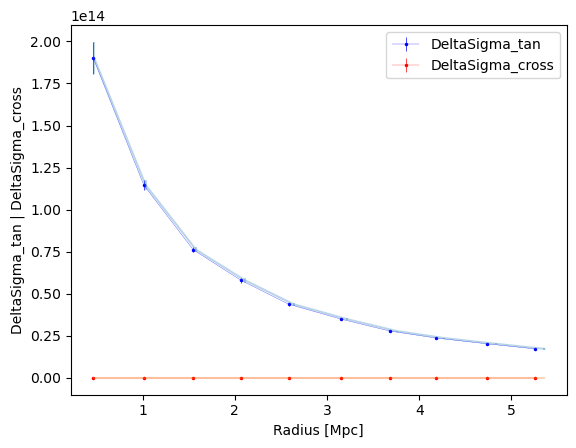

In [37]:
fig3, ax3 = cl_wrong_coordinate.plot_profiles(
    tangential_component="DeltaSigma_tan", 
    cross_component="DeltaSigma_cross",
    tangential_component_error="DeltaSigma_tan_err", 
    cross_component_error="DeltaSigma_cross_err",
    table_name="DeltaSigma_profile")


ax3.errorbar(cl_celestial.DeltaSigma_profile['radius']*1.02, cl_celestial.DeltaSigma_profile['DeltaSigma_tan'],
            yerr= cl_celestial.DeltaSigma_profile['DeltaSigma_tan_err'],alpha=0.3)

ax3.errorbar(cl_celestial.DeltaSigma_profile['radius']*1.02, cl_celestial.DeltaSigma_profile['DeltaSigma_cross'],
            yerr= cl_celestial.DeltaSigma_profile['DeltaSigma_cross_err'],alpha=0.3)

### => Similarly, we recover correct profiles, but not sure this olds when accounting for weights. 

In [44]:
cl_celestial.DeltaSigma_profile['DeltaSigma_tan'],cl_wrong_coordinate.DeltaSigma_profile['DeltaSigma_tan']

(<Column name='DeltaSigma_tan' dtype='float64' length=10>
 190051501875241.06
 114653094293426.97
  76228503835158.64
 58120008332907.984
  43811132825732.35
 34918820509793.312
  27867318283193.94
 23676492252914.723
 20277822255721.855
 17285265196381.973,
 <Column name='DeltaSigma_tan' dtype='float64' length=10>
 190051501875241.06
 114653094293426.97
  76228503835158.64
 58120008332907.984
  43811132825732.35
 34918820509793.312
  27867318283193.94
 23676492252914.723
 20277822255721.855
 17285265196381.973)